<a href="https://colab.research.google.com/github/Giovannisb/Portfolio_data_science/blob/master/model_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/pickcells/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/pickcells/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
cnn= tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
250/250 [==============================] - 4069s 16s/step - loss: 0.6778 - accuracy: 0.5738 - val_loss: 0.6385 - val_accuracy: 0.6525
Epoch 2/50
250/250 [==============================] - 84s 336ms/step - loss: 0.6190 - accuracy: 0.6576 - val_loss: 0.6529 - val_accuracy: 0.6320
Epoch 3/50
250/250 [==============================] - 84s 336ms/step - loss: 0.5773 - accuracy: 0.6966 - val_loss: 0.5487 - val_accuracy: 0.7305
Epoch 4/50
250/250 [==============================] - 87s 347ms/step - loss: 0.5422 - accuracy: 0.7266 - val_loss: 0.5211 - val_accuracy: 0.7425
Epoch 5/50
250/250 [==============================] - 83s 333ms/step - loss: 0.5189 - accuracy: 0.7416 - val_loss: 0.5060 - val_accuracy: 0.7515
Epoch 6/50
250/250 [==============================] - 84s 335ms/step - loss: 0.4972 - accuracy: 0.7542 - val_loss: 0.5350 - val_accuracy: 0.7430
Epoch 7/50
250/250 [==============================] - 83s 331ms/step - loss: 0.4861 - accuracy: 0.7621 - val_loss: 0.4792 - val_ac

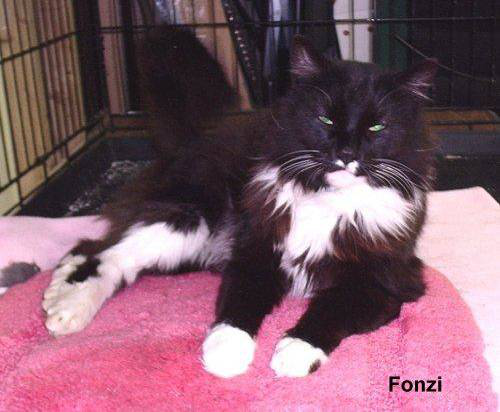

In [18]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/pickcells/dataset/test_set/cats/cat.4010.jpg')
test_image

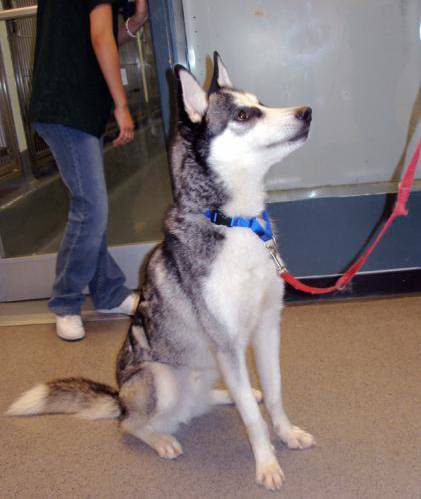

In [16]:
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/pickcells/dataset/test_set/dogs/dog.4001.jpg')
test_image

In [27]:
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/pickcells/dataset/test_set/cats/cat.4019.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)
print(training_set.class_indices)
alfa = result[0][0]
if alfa == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)
print(result)

{'cats': 0, 'dogs': 1}
cat
[[0.]]


In [28]:
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/pickcells/dataset/test_set/dogs/dog.4001.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)
print(training_set.class_indices)
print(result[0][0])
alfa = result[0][0]
if alfa == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

{'cats': 0, 'dogs': 1}
1.0
dog


In [29]:
!mkdir -p saved_model
cnn.save('/content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/pickcells/my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/pickcells/my_model/assets
